In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import os

In [2]:
#Criando um dataframe único com todos os dados de meteorologia do Rio Grande
#do Sul 2020-2024 (até Abril)

dfINMETRS = pd.DataFrame()

for dirname, _, filenames in os.walk('/kaggle/input/inmet-rs-2020-2024'):
    for filename in filenames:
        dfTemp = pd.read_csv(os.path.join(dirname, filename), sep=';', header=8, encoding='ISO-8859-1', on_bad_lines='warn')
        dfINMETRS = pd.concat([dfINMETRS, dfTemp], ignore_index=True)

dfINMETRS.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2023/01/01,0000 UTC,0,"966,1","966,1","965,6",NaN,28,"10,5","29,1","27,9","10,7","10,4",34.0,32.0,34.0,136.0,"3,8","1,5",NaN
1,2023/01/01,0100 UTC,0,"966,5","966,5","966,1",NaN,"26,6","10,1",28,"26,6","10,6",10,36.0,34.0,36.0,112.0,"3,7",",9",NaN
2,2023/01/01,0200 UTC,0,"966,8","966,8","966,5",NaN,25,"10,6","26,6",25,"10,7","10,1",40.0,35.0,40.0,129.0,"2,4","1,1",NaN
3,2023/01/01,0300 UTC,0,"966,5","966,8","966,5",NaN,"23,8","10,1","25,2","23,8","10,6",10,42.0,40.0,42.0,117.0,"2,4",",8",NaN
4,2023/01/01,0400 UTC,0,"966,3","966,5","966,2",NaN,"23,9","10,6","24,1","23,7","10,7","10,1",43.0,42.0,43.0,115.0,"2,1",",8",NaN


In [3]:
#Descrevendo o dataframe final
dfINMETRS.describe()

,UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))",Unnamed: 19
count,1.466978e+06,1.466944e+06,1.468044e+06,1.420511e+06,0.0
mean,7.837128e+01,7.297906e+01,7.573776e+01,1.512890e+02,NaN
std,1.749368e+01,1.946484e+01,1.854479e+01,9.668590e+01,NaN
min,7.000000e+00,7.000000e+00,7.000000e+00,1.000000e+00,NaN
25%,6.700000e+01,6.000000e+01,6.300000e+01,7.500000e+01,NaN
50%,8.300000e+01,7.700000e+01,8.000000e+01,1.290000e+02,NaN
75%,9.300000e+01,8.900000e+01,9.100000e+01,2.220000e+02,NaN
max,1.000000e+02,1.000000e+02,1.000000e+02,3.600000e+02,NaN


In [4]:
#Organizando os dados por data e hora
dfINMETRS.sort_values(by=['Data', 'Hora UTC'], inplace=True)
dfINMETRS.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
40848,2020/01/01,0000 UTC,0,959,959,"958,7",NaN,"22,3","20,5","22,4","21,5","20,8","20,3",95.0,88.0,90.0,61.0,"4,5","1,8",NaN
67152,2020/01/01,0000 UTC,0,"992,7","992,8",992,NaN,"25,9","21,8",27,"25,9","21,9","21,4",78.0,73.0,78.0,201.0,7,0,NaN
78840,2020/01/01,0000 UTC,0,1006,"1006,1","1004,4",NaN,"24,3","20,1","24,8","24,2","20,5","19,9",78.0,76.0,78.0,177.0,7,"1,2",NaN
87624,2020/01/01,0000 UTC,0,"934,1","934,1","933,3",NaN,"21,9","19,3","22,3","21,9","19,4","19,1",85.0,83.0,85.0,29.0,"4,2","1,8",NaN
113928,2020/01/01,0000 UTC,0,"932,2","932,2","931,3",NaN,"21,4","20,5","21,7","21,4","20,8","20,5",95.0,94.0,95.0,62.0,"3,2","1,5",NaN


In [5]:
#Descrever todas as colunas do dataframe
dfINMETRS.columns

Index(['Data', 'Hora UTC', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'Unnamed: 19'],
      dtype='object')

In [6]:
#Descrever tipos de dados para entender se será necessário realizar algum tratamento
dfINMETRS.dtypes

Data                                                      object
Hora UTC                                                  object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                          object
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     object
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)           object
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)          object
RADIACAO GLOBAL (Kj/m²)                                   object
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              object
TEMPERATURA DO PONTO DE ORVALHO (°C)                      object
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                object
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                object
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)          object
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)          object
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 float64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 float64
UMIDADE RELATIVA DO AR, H

In [7]:
#Convertendo as colunas Data, Hora UTC e Precipitação total para os tipos de data/hora e float
dfINMETRS['Data'] = pd.to_datetime(dfINMETRS['Data'], format='%Y/%m/%d').dt.date
dfINMETRS['Hora UTC'] = dfINMETRS['Hora UTC'].str.split(' ', expand=True)[0]
dfINMETRS['Hora UTC'] = pd.to_datetime(dfINMETRS['Hora UTC'], format='%H%M').dt.time
dfINMETRS['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dfINMETRS['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].str.replace(',', '.')
dfINMETRS['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = pd.to_numeric(dfINMETRS['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])

dfINMETRS.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
40848,2020-01-01,00:00:00,0.0,959,959,"958,7",NaN,"22,3","20,5","22,4","21,5","20,8","20,3",95.0,88.0,90.0,61.0,"4,5","1,8",NaN
67152,2020-01-01,00:00:00,0.0,"992,7","992,8",992,NaN,"25,9","21,8",27,"25,9","21,9","21,4",78.0,73.0,78.0,201.0,7,0,NaN
78840,2020-01-01,00:00:00,0.0,1006,"1006,1","1004,4",NaN,"24,3","20,1","24,8","24,2","20,5","19,9",78.0,76.0,78.0,177.0,7,"1,2",NaN
87624,2020-01-01,00:00:00,0.0,"934,1","934,1","933,3",NaN,"21,9","19,3","22,3","21,9","19,4","19,1",85.0,83.0,85.0,29.0,"4,2","1,8",NaN
113928,2020-01-01,00:00:00,0.0,"932,2","932,2","931,3",NaN,"21,4","20,5","21,7","21,4","20,8","20,5",95.0,94.0,95.0,62.0,"3,2","1,5",NaN


In [8]:
#Conferindo se as conversões funcionaram conforme o esperado
dfINMETRS.dtypes

Data                                                      object
Hora UTC                                                  object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     object
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)           object
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)          object
RADIACAO GLOBAL (Kj/m²)                                   object
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              object
TEMPERATURA DO PONTO DE ORVALHO (°C)                      object
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                object
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                object
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)          object
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)          object
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 float64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 float64
UMIDADE RELATIVA DO AR, H

In [9]:
#Não deu muito certo, então vou tentar colocar data e hora na coluna de data
data_e_hora = dfINMETRS['Data'].astype(str) + ' ' + dfINMETRS['Hora UTC'].astype(str)
dfINMETRS['Data'] = pd.to_datetime(data_e_hora)

dfINMETRS.dtypes

Data                                                     datetime64[ns]
Hora UTC                                                         object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                                float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)            object
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)                  object
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)                 object
RADIACAO GLOBAL (Kj/m²)                                          object
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                     object
TEMPERATURA DO PONTO DE ORVALHO (°C)                             object
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                       object
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                       object
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)                 object
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)                 object
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                        

In [10]:
#Criando o dataframe com os dados mais recentes de Maio do Rio Grande do Sul
dfMaio = pd.DataFrame()

for dirname, _, filenames in os.walk('/kaggle/input/dados-recentes-inmet-rs-maio-2024'):
    for filename in filenames:
        dfTemp = pd.read_csv(os.path.join(dirname, filename), sep=';', header=9, encoding='ISO-8859-1', on_bad_lines='warn')
        dfMaio = pd.concat([dfMaio, dfTemp], ignore_index=True)

dfMaio.head()

,Data Medicao,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)",Unnamed: 3
0,2024-05-01,0,0,NaN
1,2024-05-01,100,0,NaN
2,2024-05-01,200,0,NaN
3,2024-05-01,300,0,NaN
4,2024-05-01,400,0,NaN


In [11]:
#Verificando tipos de dados
dfMaio.dtypes

Data Medicao                        object
Hora Medicao                         int64
PRECIPITACAO TOTAL, HORARIO(mm)     object
Unnamed: 3                         float64
dtype: object

In [12]:
#Convertendo as colunas Data e Precipitação total para os tipos de data/hora e float
dfMaio['Data Medicao'] = pd.to_datetime(dfMaio['Data Medicao'])
dfMaio['PRECIPITACAO TOTAL, HORARIO(mm)'] = dfMaio['PRECIPITACAO TOTAL, HORARIO(mm)'].str.replace(',', '.')
dfMaio['PRECIPITACAO TOTAL, HORARIO(mm)'] = pd.to_numeric(dfMaio['PRECIPITACAO TOTAL, HORARIO(mm)'])

dfMaio.dtypes

Data Medicao                       datetime64[ns]
Hora Medicao                                int64
PRECIPITACAO TOTAL, HORARIO(mm)           float64
Unnamed: 3                                float64
dtype: object

In [13]:
#Renomeando as colunas pois há pequenas diferenças que podem evitar a mesclagem
dfMaio.rename(columns={'Data Medicao': 'Data', 'Hora Medicao': 'Hora UTC', 'PRECIPITACAO TOTAL, HORARIO(mm)': 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'}, inplace=True)

#Removendo uma coluna que está sem título e não é aplicável para essa análise
dfMaio.drop(columns=['Unnamed: 3'], inplace=True)

dfMaio.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"
0,2024-05-01,0,0.0
1,2024-05-01,100,0.0
2,2024-05-01,200,0.0
3,2024-05-01,300,0.0
4,2024-05-01,400,0.0


In [14]:
#Mesclar os valores
dfTemp = pd.concat([dfINMETRS, dfMaio], ignore_index=True)

#Verificando se deu certo
dfTemp.tail()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
1696867,2024-05-13,1900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696868,2024-05-13,2000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696869,2024-05-13,2100,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696870,2024-05-13,2200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696871,2024-05-13,2300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Mesclando ao dataset principal
dfINMETRS = pd.concat([dfINMETRS, dfMaio], ignore_index=True)

dfINMETRS.tail()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
1696867,2024-05-13,1900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696868,2024-05-13,2000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696869,2024-05-13,2100,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696870,2024-05-13,2200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696871,2024-05-13,2300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Precipitação total agregada por dia
dfDia = dfINMETRS.groupby(pd.Grouper(key='Data', freq='D')).agg({'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'sum'})
#Resetando o índice porque a coluna "Data" estava como índice e não era
#possível realizar tratamentos dos dados com ela
dfDia.reset_index(inplace=True)
dfDia['Ano'] = dfDia['Data'].dt.strftime('%Y')
dfDia['Dia'] = dfDia['Data'].dt.strftime('%m-%d')

dfDia.tail()

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",Ano,Dia
1590,2024-05-09,27.6,2024,05-09
1591,2024-05-10,743.4,2024,05-10
1592,2024-05-11,789.2,2024,05-11
1593,2024-05-12,1511.0,2024,05-12
1594,2024-05-13,429.8,2024,05-13


In [17]:
#Precipitação total agregada por semana
dfSemana = dfINMETRS.groupby(pd.Grouper(key='Data', freq='W-MON')).agg({'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'sum'})
dfSemana.reset_index(inplace=True)
dfSemana['Ano'] = dfSemana['Data'].dt.strftime('%Y')
dfSemana['Mês'] = dfSemana['Data'].dt.strftime('%m')
dfSemana['Semana'] = dfSemana['Data'].dt.strftime('%W')


dfSemana.tail()

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",Ano,Mês,Semana
223,2024-04-15,2631.0,2024,04,16
224,2024-04-22,1924.6,2024,04,17
225,2024-04-29,3813.8,2024,04,18
226,2024-05-06,9342.6,2024,05,19
227,2024-05-13,4172.4,2024,05,20


In [18]:
#Precipitação total agregada por mês
dfMes = dfINMETRS.groupby(pd.Grouper(key='Data', freq='ME')).agg({'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'sum'})
dfMes.reset_index(inplace=True)
dfMes['Ano'] = dfMes['Data'].dt.strftime('%Y')
dfMes['Mês'] = dfMes['Data'].dt.strftime('%m')

dfMes.tail()

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",Ano,Mês
48,2024-01-31,5893.0,2024,01
49,2024-02-29,5150.6,2024,02
50,2024-03-31,6696.8,2024,03
51,2024-04-30,12190.0,2024,04
52,2024-05-31,11543.4,2024,05


In [19]:
#Precipitação total agregada por ano
dfAno = dfINMETRS.groupby(pd.Grouper(key='Data', freq='YE')).agg({'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'sum'})
dfAno.reset_index(inplace=True)
dfAno['Ano'] = dfAno['Data'].dt.strftime('%Y')

dfAno.head()

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",Ano
0,2020-12-31,50494.4,2020
1,2021-12-31,48339.2,2021
2,2022-12-31,55392.2,2022
3,2023-12-31,85992.8,2023
4,2024-12-31,41473.8,2024


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

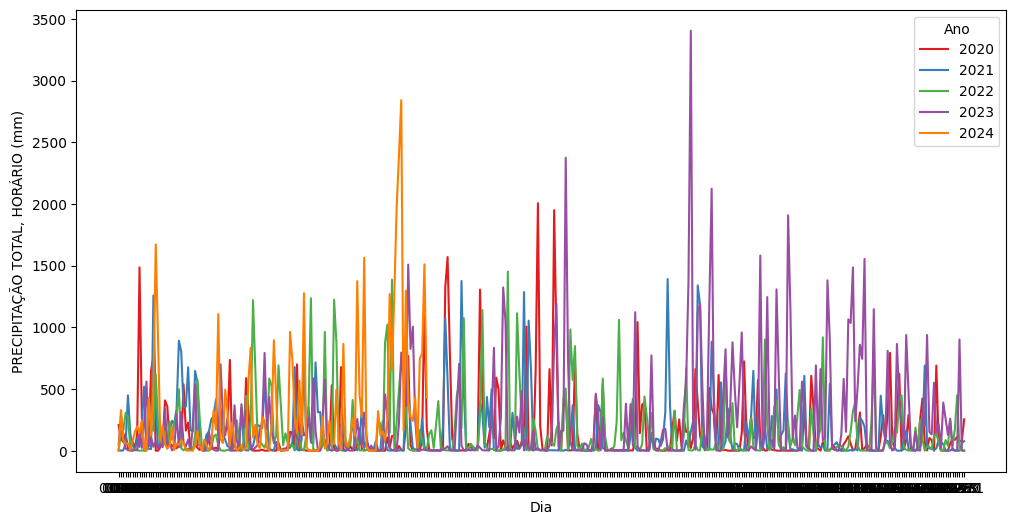

In [20]:
#Montar os gráficos para começar a fazer comparações
#Por dia
plt.figure(figsize=(12,6))

sns.lineplot(data=dfDia, x='Dia', y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', hue='Ano', palette='Set1', errorbar=None)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

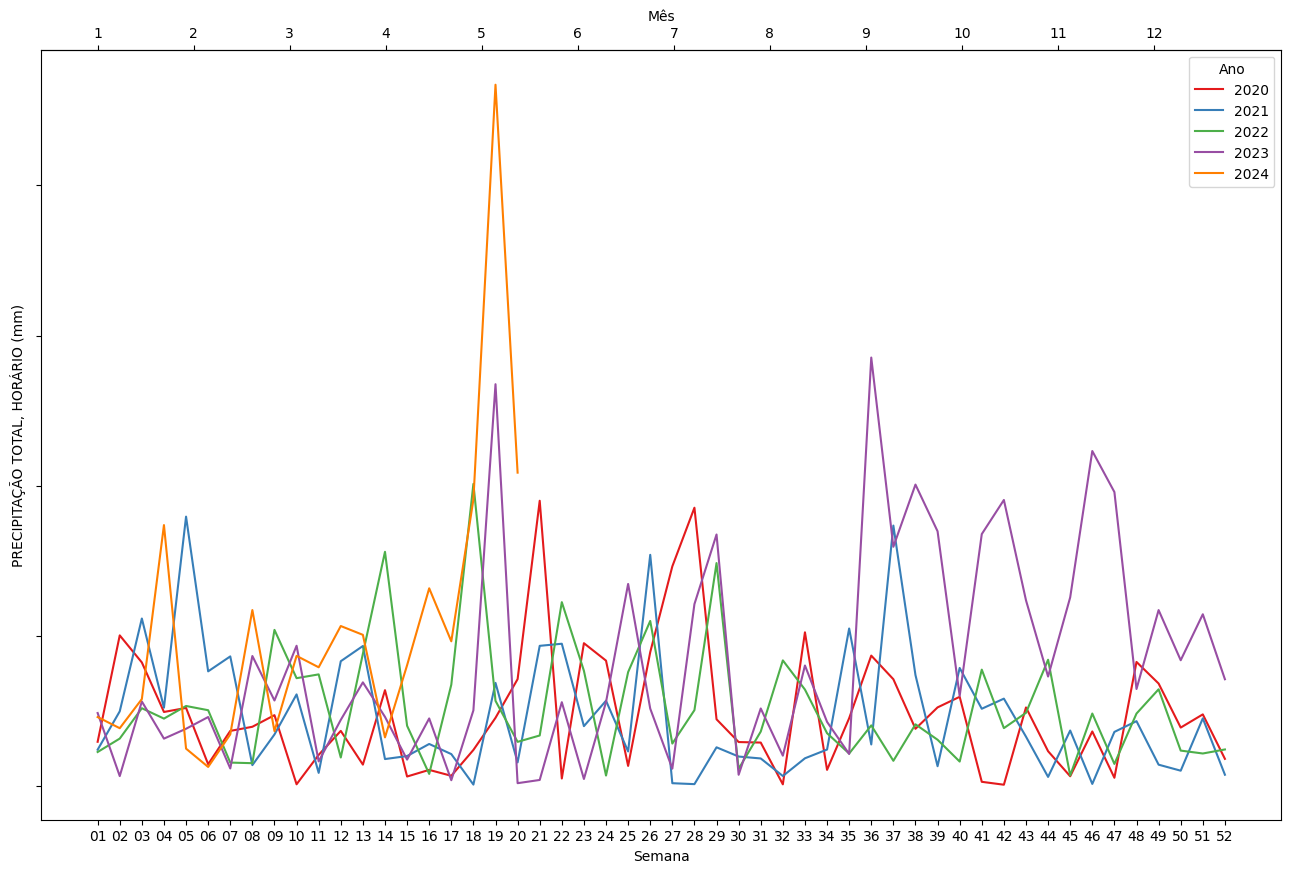

In [21]:
#Por semana
plt.figure(figsize=(16,10))

semana = sns.lineplot(data=dfSemana, x='Semana', y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', hue='Ano', palette='Set1')

#Removendo os valores no rótulo Y pois os valores são a soma e não fazem sentido
#A ideia é dimensionar somente a escala em comparação com outras datas
semana.set(yticklabels=[])

#Criando um rótulo secundário para facilitar a visualização
ax = plt.gca().secondary_xaxis('top', functions=(lambda x: (x / 4.345) + 1, lambda x: x))
#Exibindo os meses de 1 em 1
ax.set_xlabel('Mês')
ax.xaxis.set_major_locator(MultipleLocator(base=1))
#Estava gerando o mês 13, então o código abaixo remove
ax.set_xticks(range(0, 13))

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

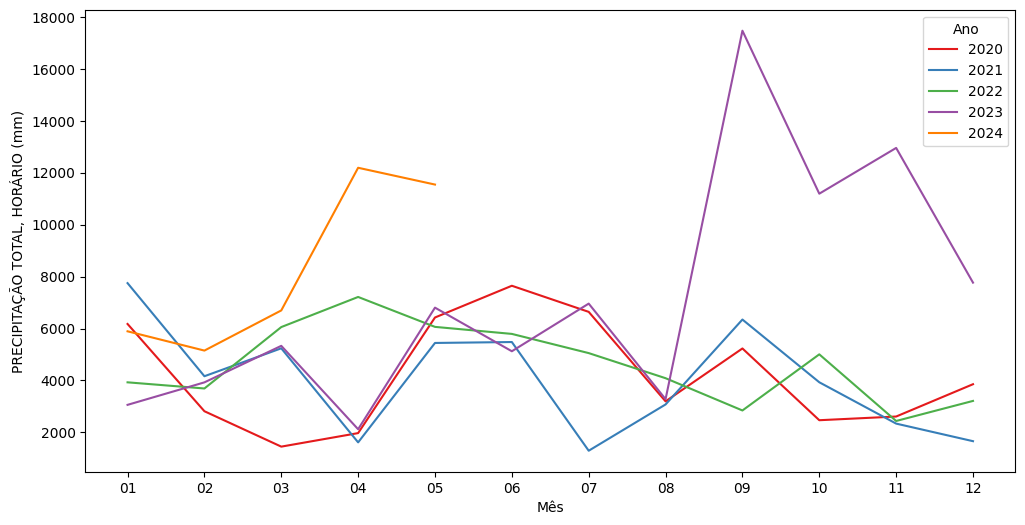

In [22]:
#Por mês
plt.figure(figsize=(12,6))

sns.lineplot(data=dfMes, x='Mês', y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', hue='Ano', palette='Set1', errorbar=None)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


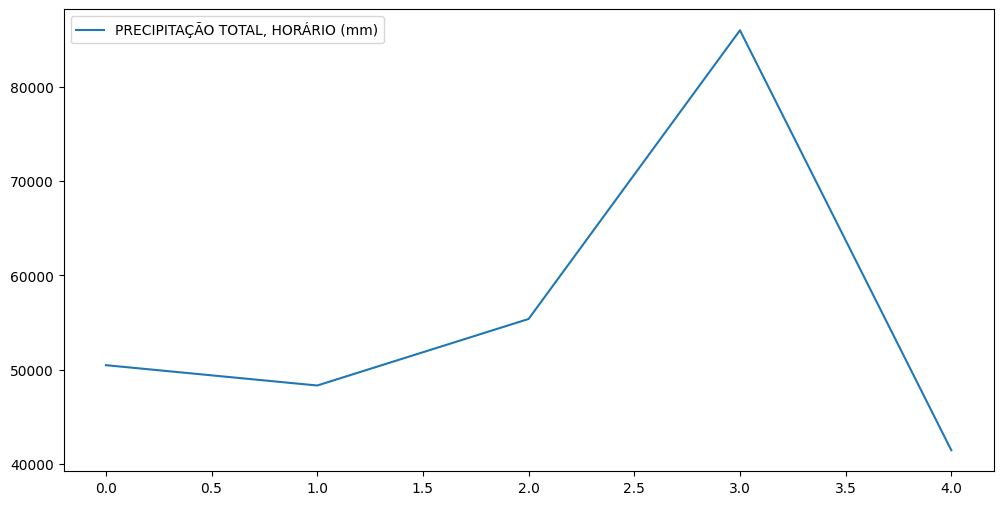

In [23]:
#Por ano (esse vai ser incompleto pois o ano de 2024 não foi encerrado) plt.figure(figsize=(12,6))
plt.figure(figsize=(12,6))

sns.lineplot(data=dfAno)

plt.show()